In [2]:
#import Dependencies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import requests 
import time 
from api_keys import api_key
import json

from citipy import citipy
#Get CSV file 
output_data_file = "output_data/cities.csv"


# Lat and Lng ranges 
lat_range = (-90, 90)
lng_range = (-180,180)

In [3]:
# lists for lat and lng and cities
lat_lng = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#identify the nearest city for each lat lng combination 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name 
    
    
    # if the city name is unique then add it to the cities list
    if city not in cities:
        cities.append(city)
        
len(cities)


615

PERFORM API CALLS:

In [4]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [5]:
# Create empty lists for the api
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_record = []

# start the record 
record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")
#loop through cities in the list 
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response['clouds']['all'])
        country.append(response["sys"]['country'])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record.append(response["name"])
#         print(city.replace("%20", " "))
        print(f"Processing Record {city}")
        
        record = record +1
        time.sleep(1.01)
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record vasai
Processing Record qianjiang
Processing Record fonte boa
Processing Record thompson
Processing Record rikitea
Processing Record beloha
Processing Record husavik
Processing Record saldanha
Processing Record butaritari
Processing Record katsuura
Processing Record tasiilaq
Processing Record bluff
Processing Record cape town
Processing Record mayo
Processing Record key largo
Processing Record qaanaaq
Processing Record albany
Processing Record luganville
Processing Record mount isa
Processing Record fortuna
Processing Record dikson
City not found. Skipping...
Processing Record dauphin
Processing Record itarema
Processing Record flinders
Processing Record airai
Processing Record astoria
Processing Record bharatpur
Processing Record touros
Processing Record ushuaia
Processing Record georgetown
Processing Record bathsheba
Processing Record vaini
Processing Record barrow
Processing Record bubaque
City not found. Ski

Processing Record carnarvon
Processing Record cadereyta
Processing Record port-gentil
Processing Record adrar
Processing Record gandorhun
Processing Record alcaniz
Processing Record peshawar
Processing Record tanete
Processing Record port elizabeth
Processing Record klaksvik
Processing Record san ignacio
Processing Record yongzhou
City not found. Skipping...
Processing Record rapid valley
Processing Record sioux lookout
Processing Record loandjili
Processing Record kutum
Processing Record mlowo
Processing Record uyemskiy
Processing Record redlands
Processing Record ghotki
Processing Record berdigestyakh
Processing Record semnan
Processing Record la ronge
Processing Record lompoc
Processing Record troy
Processing Record kroya
Processing Record geraldton
Processing Record cherskiy
Processing Record plettenberg bay
Processing Record flin flon
Processing Record sillamae
City not found. Skipping...
Processing Record ucluelet
Processing Record lagoa
Processing Record gerash
Processing Record

Processing Record tayoltita
Processing Record labytnangi
Processing Record preobrazheniye
Processing Record ozinki
Processing Record caravelas
Processing Record szczytno
City not found. Skipping...
Processing Record kahului
Processing Record camacupa
Processing Record isla mujeres
Processing Record port moresby
Processing Record west wendover
Processing Record gushikawa
City not found. Skipping...
Processing Record bijie
Processing Record kununurra
City not found. Skipping...
Processing Record opuwo
Processing Record suntar
Processing Record lyubim


In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [7]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vasai,100,IN,1563141373,80,22.43,69.93,83.68,28.68
1,Qianjiang,67,CN,1563141375,92,30.43,112.89,73.24,1.81
2,Fonte Boa,61,BR,1563141144,77,-2.51,-66.09,83.32,5.14
3,Thompson,75,CA,1563141102,60,55.74,-97.86,68.00,3.47
4,Rikitea,66,PF,1563141379,84,-23.12,-134.97,74.68,14.76


Latitude vs. Temperature

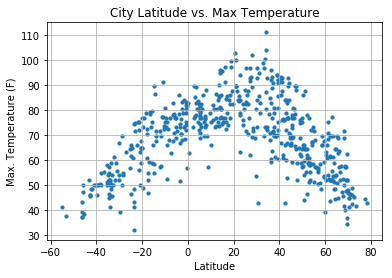

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

Latitude vs. Humidity

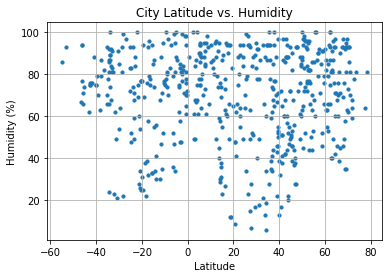

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()


Latitude vs. Cloudiness

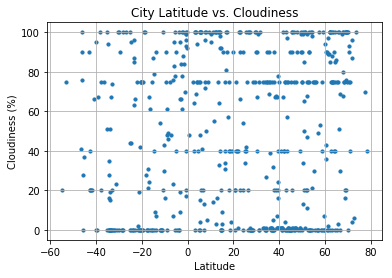

In [13]:
#Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

Latitude vs. Wind Speed 

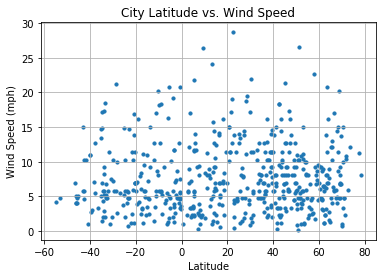

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()